In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="6"

In [2]:
import cv2
from PIL import  Image
import numpy as np

In [7]:
image_directory = '/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/'

dataset=[]
label=[]

no_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/no')
yes_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/yes')


for i , image_name in enumerate(no_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'no/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(0)
        
        
        
for i , image_name in enumerate(yes_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'yes/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(1)
        
        
        
        
print(len(dataset))
print(len(label))
dataset=np.array(dataset)
label=np.array(label)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import normalize
x_train= normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

3000
3000
(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


In [4]:
import tensorflow as tf
from tensorflow import keras
classifier1 = tf.keras.models.load_model('/data1/hom1/ict06/Models/efficientB0(BT).h5')
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred1= (classifier1.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred1)
from sklearn.metrics import roc_curve
fpr1 , tpr1, thresholds = roc_curve(y_test, y_pred1)
print(cm)

2022-02-07 08:52:06.578631: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-02-07 08:52:06.690964: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2022-02-07 08:52:06.690995: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-02-07 08:52:06.697731: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-02-07 08:52:06.697776: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-02-07 08:52:06.707846: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.

[[338   5]
 [  2 255]]


In [5]:

classifier2 = tf.keras.models.load_model('/data1/hom1/ict06/Models/BraintumorVGG10Epochs.h5')
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred2= (classifier2.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred2)
from sklearn.metrics import roc_curve
fpr2 , tpr2, thresholds = roc_curve(y_test, y_pred2)
print(cm)

[[338   5]
 [  3 254]]


In [8]:
classifier3 = tf.keras.models.load_model('/data1/hom1/ict06/Models/InceptionResnetV2(BT).h5')
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred3= (classifier3.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred3)
from sklearn.metrics import roc_curve
fpr3 , tpr3, thresholds = roc_curve(y_test, y_pred3)
print(cm)

[[337   6]
 [  4 253]]


In [9]:
classifier4 = tf.keras.models.load_model('/data1/hom1/ict06/Models/incV3.h5')
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred4= (classifier3.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred4)
from sklearn.metrics import roc_curve
fpr4 , tpr4, thresholds = roc_curve(y_test, y_pred4)
print(cm)

[[337   6]
 [  4 253]]


In [6]:
classifier5 = tf.keras.models.load_model('/data1/hom1/ict06/Models/expirement2.h5')
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred5= (classifier5.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred5)
from sklearn.metrics import roc_curve
fpr5 , tpr5, thresholds = roc_curve(y_test, y_pred5)
print(cm)

[[334   9]
 [ 16 241]]


In [10]:
classifier6 = tf.keras.models.load_model('/data1/hom1/ict06/Models/Xception(BT).h5')
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred6= (classifier6.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred6)
from sklearn.metrics import roc_curve
fpr6 , tpr6, thresholds = roc_curve(y_test, y_pred6)
print(cm)

[[334   9]
 [  4 253]]


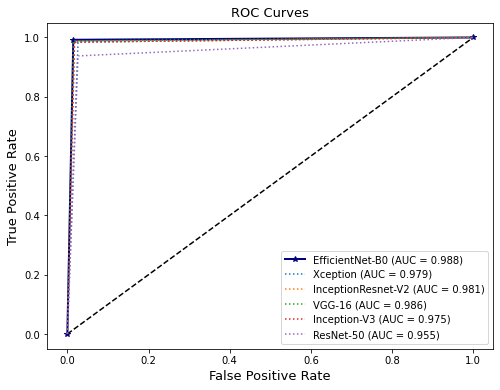

In [14]:

import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager

font = font_manager.FontProperties(
                                   
                                   style='normal', size=10)



plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "EfficientNet-B0 (AUC = 0.988)",color='navy', marker='*', linewidth=2, markersize=6)
plt.plot(fpr6, tpr6, label= "Xception (AUC = 0.979)", linestyle=':')
plt.plot(fpr3, tpr3, label= "InceptionResnet-V2 (AUC = 0.981)", linestyle=":")
plt.plot(fpr2, tpr2, label= "VGG-16 (AUC = 0.986)", linestyle=":")
plt.plot(fpr4, tpr4, label= "Inception-V3 (AUC = 0.975)", linestyle=":")
plt.plot(fpr5, tpr5, label= "ResNet-50 (AUC = 0.955)", linestyle=":")
plt.legend(loc="best" , prop=font)
plt.xlabel("False Positive Rate",fontsize=13)
plt.ylabel("True Positive Rate",fontsize=13)
plt.title('ROC Curves',fontsize=13)

plt.gcf().set_size_inches(8, 6)
plt.savefig('ROCnew.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
import tensorflow as tf
from tensorflow import keras
classifier1 = tf.keras.models.load_model('/data1/hom1/ict06/Models/efficientB0(BT).h5')
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred1= (classifier1.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred1)
from sklearn.metrics import roc_curve
fpr1 , tpr1, thresholds = roc_curve(y_test, y_pred1)
print(cm)

[[338   5]
 [  2 255]]


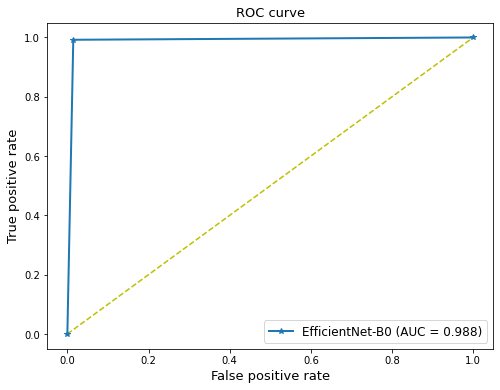

In [38]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager

font = font_manager.FontProperties(
                                   
                                   style='normal', size=12)
from sklearn.metrics import roc_curve
y_pred1= (classifier1.predict(x_test)>= mythreshold).astype(int)
fpr1 , tpr1, thresholds = roc_curve(y_test, y_pred1)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr1, tpr1, label= "EfficientNet-B0 (AUC = 0.988)" , marker='*', linewidth=2, markersize=6)
plt.xlabel('False positive rate',fontsize=13)
plt.ylabel('True positive rate',fontsize=13)
plt.title('ROC curve',fontsize=13)
plt.legend(loc="best" , prop=font)
plt.gcf().set_size_inches(8, 6)
plt.savefig('ROCplot3.png', dpi=300, bbox_inches='tight')
plt.show()